## Random Value Imputer
- No libraries in sklearn. (used pandas)
- applied on both categorical as well as numerical data
- good for linear algo and not for tree algo

## Benefits :
- its easy to apply
- Preserves the variance of the varaibale
## Disadvantage
- Memory heavy for deployment, as we need to store the original training set to extract values from and replace the NA in coming observations.
- Well suited for linear models as it does not distort the distribution, regardless of the % of NA
- covariance is distorted

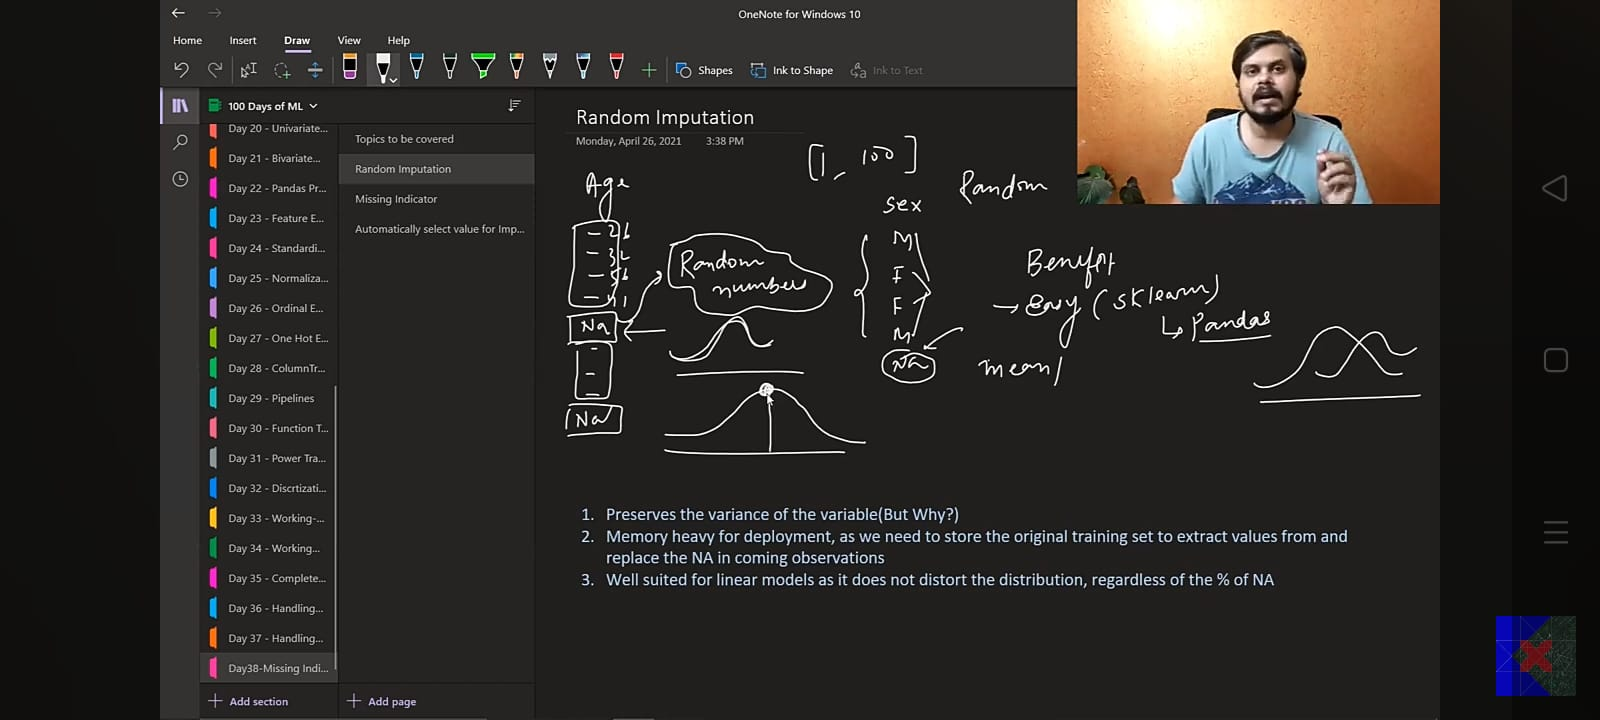

In [147]:
from PIL import Image
import IPython.display

img = Image.open(r"C:\Users\Admin\Documents\Jupyter Notebook\Machine Learning (CampusX)\random_value_imputation.jpeg")
display(img)

In [148]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split

In [149]:
df=pd.read_csv(r"C:\Users\Admin\Documents\Jupyter Notebook\Machine Learning (CampusX)\Dataset\train.csv",usecols=['Age','Fare','Survived'])

In [150]:
df.head()

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500


In [151]:
df.isnull().mean()*100

Survived     0.00000
Age         19.86532
Fare         0.00000
dtype: float64

In [152]:
X = df.drop('Survived',axis=1)
y = df['Survived']

In [153]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=128)

In [154]:
X_train.shape,X_test.shape

((623, 2), (268, 2))

In [155]:
X_train['Age_imputed'] = X_train['Age']
X_test['Age_imputed'] = X_test['Age']

In [156]:
X_train['Age_imputed'][X_train['Age_imputed'].isnull()]= X_train['Age'].dropna().sample(X_train['Age'].isnull().sum()).values
X_test['Age_imputed'][X_test['Age_imputed'].isnull()] = X_test['Age'].dropna().sample(X_test['Age'].isnull().sum()).values

C:\Users\Admin\AppData\Local\Temp\ipykernel_3012\1879342923.py:1: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  X_train['Age_imputed'][X_train['Age_imputed'].isnull()]= X_train['Age'].dropna().sample(X_train['Age'].isnull().sum()).values
C:\

In [157]:
X_train.head()

,Age,Fare,Age_imputed
67,19.0,8.1583,19.0
628,26.0,7.8958,26.0
556,48.0,39.6000,48.0
372,19.0,8.0500,19.0
709,NaN,15.2458,19.0


C:\Users\Admin\AppData\Local\Temp\ipykernel_3012\624579197.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x=X_train['Age'],label='Orginal',hist=False)
C:\Users\Admin\AppData\Local\Temp\ipykernel_3012\624579197.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x=X_train['

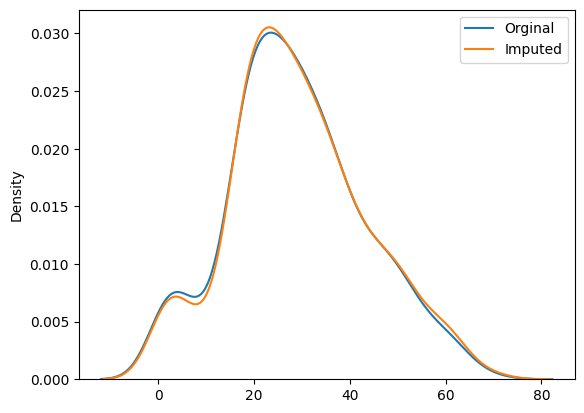

In [158]:
sns.distplot(x=X_train['Age'],label='Orginal',hist=False)
sns.distplot(x=X_train['Age_imputed'], label='Imputed',hist=False)
plt.legend()

In [159]:
print("Variance of original data is ",X_train['Age'].var())
print("Variance of imputed data is ", X_train['Age_imputed'].var())

Variance of original data is  200.16845900240477
Variance of imputed data is  203.53517165618084


In [160]:
X_train[['Fare','Age','Age_imputed']].cov()  ## change in var

,Fare,Age,Age_imputed
Fare,2808.011519,91.818914,62.671442
Age,91.818914,200.168459,200.168459
Age_imputed,62.671442,200.168459,203.535172


<Axes: >

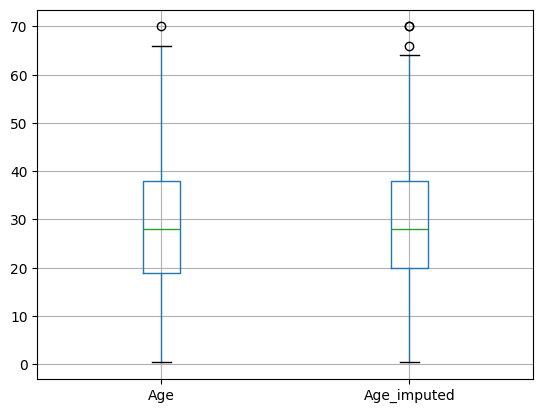

In [161]:
X_train[['Age','Age_imputed']].boxplot()

Note : for given input we want the same output in case of random value imputer

In [162]:
# sampled_value = X_train['Age'].dropna().sample(1, random_state=int(Observation['Fare']))

## 2nd Example

In [163]:
data = pd.read_csv(r"C:\Users\Admin\Documents\Jupyter Notebook\Machine Learning (CampusX)\Dataset\housing.csv",usecols=['SalePrice','FireplaceQu','GarageQual'])

In [164]:
data.head()

,FireplaceQu,GarageQual,SalePrice
0,NaN,TA,208500
1,TA,TA,181500
2,TA,TA,223500
3,Gd,TA,140000
4,TA,TA,250000


In [165]:
data.isnull().mean()*100

FireplaceQu    47.260274
GarageQual      5.547945
SalePrice       0.000000
dtype: float64

In [166]:
X = data
y=data['SalePrice']

In [167]:
X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=0,test_size=0.3)

In [168]:
X_train.head(5)

,FireplaceQu,GarageQual,SalePrice
64,NaN,TA,219500
682,Gd,TA,173000
960,NaN,NaN,116500
1384,NaN,TA,105000
1100,NaN,TA,60000


In [169]:
X_train['Fp_imputed'] = X_train['FireplaceQu']
X_test['Fp_imputed'] = X_test['FireplaceQu']

X_train['Gq_imputed'] = X_train['GarageQual']
X_test['Gq_imputed'] = X_test['GarageQual']

In [170]:
X_test.head()

,FireplaceQu,GarageQual,SalePrice,Fp_imputed,Gq_imputed
529,TA,TA,200624,TA,TA
491,TA,TA,133000,TA,TA
459,TA,TA,110000,TA,TA
279,TA,TA,192000,TA,TA
655,NaN,TA,88000,NaN,TA


In [171]:
X_train['Gq_imputed'][X_train['Gq_imputed'].isnull()] = X_train['GarageQual'].dropna().sample(X_train['GarageQual'].isnull().sum()).values
X_test['Gq_imputed'][X_test['Gq_imputed'].isnull()] = X_test['GarageQual'].dropna().sample(X_test['GarageQual'].isnull().sum()).values

X_train['Fp_imputed'][X_train['Fp_imputed'].isnull()] = X_train['FireplaceQu'].dropna().sample(X_train['FireplaceQu'].isnull().sum()).values
X_test['Fp_imputed'][X_test['Fp_imputed'].isnull()] = X_test['FireplaceQu'].dropna().sample(X_test['FireplaceQu'].isnull().sum()).values


C:\Users\Admin\AppData\Local\Temp\ipykernel_3012\2054011165.py:1: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  X_train['Gq_imputed'][X_train['Gq_imputed'].isnull()] = X_train['GarageQual'].dropna().sample(X_train['GarageQual'].isnull().sum(

In [172]:
X_train.head()

,FireplaceQu,GarageQual,SalePrice,Fp_imputed,Gq_imputed
64,NaN,TA,219500,Gd,TA
682,Gd,TA,173000,Gd,TA
960,NaN,NaN,116500,Gd,TA
1384,NaN,TA,105000,TA,TA
1100,NaN,TA,60000,TA,TA


In [173]:
temp = pd.concat(
    [
        X_train['GarageQual'].value_counts()/ len(X_train['GarageQual'].dropna()),
        X_train['Gq_imputed'].value_counts()/len(X_train)
    ],axis=1)
temp.columns=['Original','imputed']

In [174]:
temp

,Original,imputed
TA,0.949380,0.948141
Fa,0.036157,0.037182
Gd,0.009298,0.009785
Po,0.003099,0.002935
Ex,0.002066,0.001957


In [175]:
temp1 = pd.concat(
    [
        X_train['FireplaceQu'].value_counts()/ len(X_train['FireplaceQu'].dropna()),
        X_train['Fp_imputed'].value_counts()/ len(X_train)
    ],axis=1)
temp1.columns=['Original','imputed']

In [176]:
temp1

,Original,imputed
Gd,0.468750,0.471624
TA,0.420956,0.420744
Fa,0.047794,0.044031
Ex,0.033088,0.035225
Po,0.029412,0.028376


C:\Users\Admin\AppData\Local\Temp\ipykernel_3012\4036306596.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x=X_train[X_train['FireplaceQu']==category]['SalePrice'],hist=False,label=category)
C:\Users\Admin\AppData\Local\Temp\ipykernel_3012\4036306596.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6

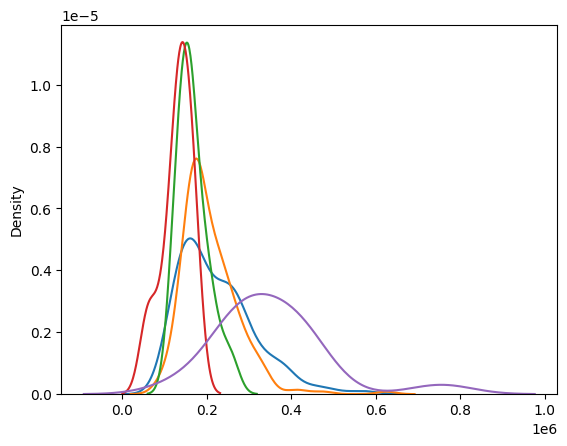

In [178]:
for category in X_train['FireplaceQu'].dropna().unique():
    sns.distplot(x=X_train[X_train['FireplaceQu']==category]['SalePrice'],hist=False,label=category)  

C:\Users\Admin\AppData\Local\Temp\ipykernel_3012\3139901556.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x=X_train[X_train['Fp_imputed']==category]['SalePrice'],hist=False,label=category)
C:\Users\Admin\AppData\Local\Temp\ipykernel_3012\3139901556.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad63

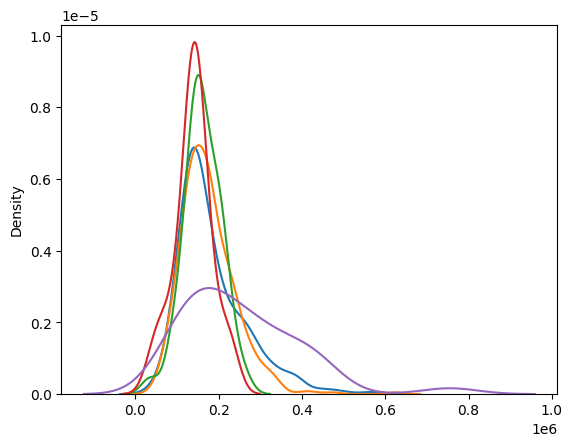

In [179]:
for category in X_train['Fp_imputed'].dropna().unique():
    sns.distplot(x=X_train[X_train['Fp_imputed']==category]['SalePrice'],hist=False,label=category)  